In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("/Users/hilmanyusoh/Desktop/Customer-Segmentation-Machine-Learning/data/Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(data.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

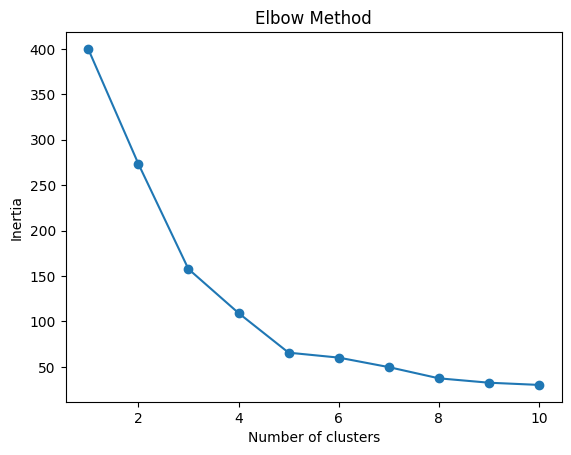

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
df['Cluster'] = clusters

In [11]:
cluster_profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


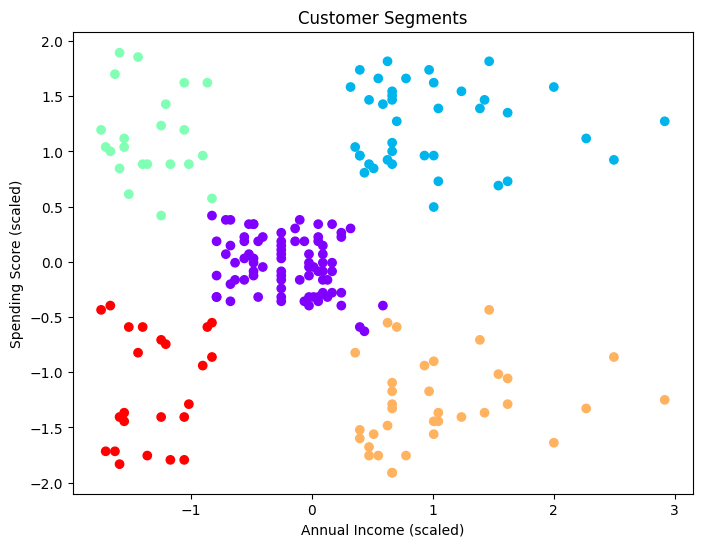

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='rainbow')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments")
plt.show()


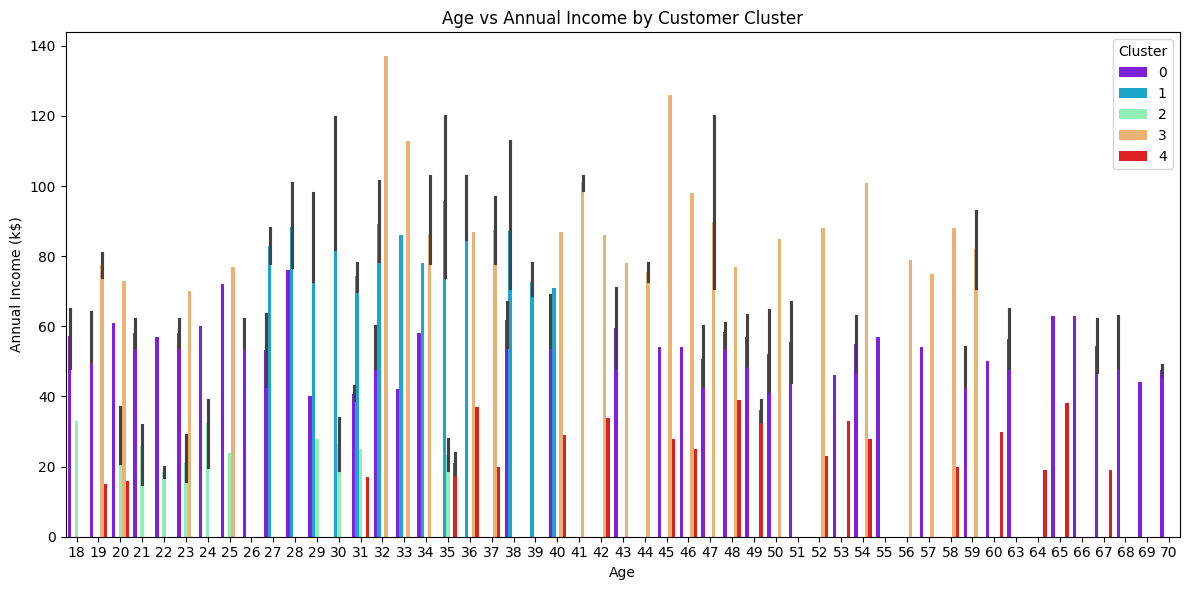

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# สมมุติว่าคุณมี df และได้ clusters จาก KMeans แล้ว
df['Cluster'] = clusters  # เพิ่มคอลัมน์ Cluster ลงใน DataFrame

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Age', y='Annual Income (k$)', hue='Cluster', palette='rainbow')
plt.title("Age vs Annual Income by Customer Cluster")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
